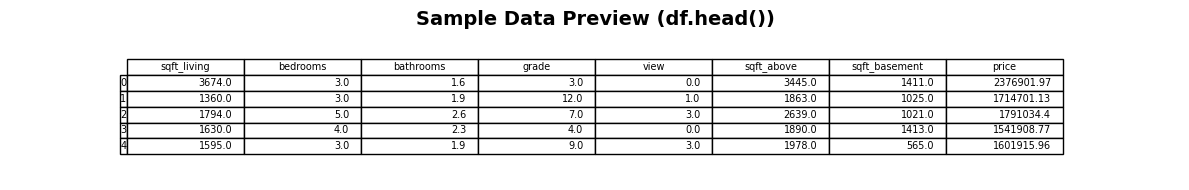

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table

# Sample dataset generation
np.random.seed(42)
n = 10
df = pd.DataFrame({
    'sqft_living': np.random.randint(500, 4000, size=n),
    'bedrooms': np.random.randint(1, 6, size=n),
    'bathrooms': np.random.uniform(1, 4, size=n).round(1),
    'grade': np.random.randint(1, 13, size=n),
    'view': np.random.randint(0, 5, size=n),
    'sqft_above': np.random.randint(500, 3500, size=n),
    'sqft_basement': np.random.randint(0, 1500, size=n)
})

df['price'] = (
    df['sqft_living'] * 300 +
    df['bedrooms'] * 10000 +
    df['bathrooms'] * 20000 +
    df['grade'] * 50000 +
    df['view'] * 15000 +
    df['sqft_above'] * 200 +
    df['sqft_basement'] * 250 +
    np.random.normal(0, 30000, size=n)
).round(2)

# Show first few rows as an image
fig, ax = plt.subplots(figsize=(12, 2))  # Adjust height if needed
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)
table(ax, df.head(), loc='center', colWidths=[0.1]*len(df.columns))

plt.title("Sample Data Preview (df.head())", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [38]:
### import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load dataset
df = pd.read_csv("Downloads/kc_house_data.csv.zip")

# Select top features correlated with price
features = ['sqft_living', 'bedrooms', 'bathrooms', 'grade', 'view', 'sqft_above', 'sqft_basement']
X = df[features]
y = df['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}\n")

# Ask user for input
try:
    sqft_living = float(input("Enter square feet of living space: "))
    bedrooms = int(input("Enter number of bedrooms: "))
    bathrooms = float(input("Enter number of bathrooms: "))
    grade = int(input("Enter house grade (1-13): "))
    view = int(input("Enter view rating (0-4): "))
    sqft_above = float(input("Enter square feet above ground: "))
    sqft_basement = float(input("Enter square feet of basement: "))

    # Predict
    input_data = [[sqft_living, bedrooms, bathrooms, grade, view, sqft_above, sqft_basement]]
    predicted_price = model.predict(input_data)[0]
    print(f"\n Predicted House Price: ${predicted_price:,.2f}")

except ValueError:
    print(" Invalid input. Please enter correct numeric values.")


📊 Model Evaluation:
Root Mean Squared Error (RMSE): $250,853.93
R² Score: 0.5837



Enter square feet of living space:  2222
Enter number of bedrooms:  22
Enter number of bathrooms:  33
Enter house grade (1-13):  2
Enter view rating (0-4):  32
Enter square feet above ground:  46321432
Enter square feet of basement:  1234513



💰 Predicted House Price: $2,252,542,060.63


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


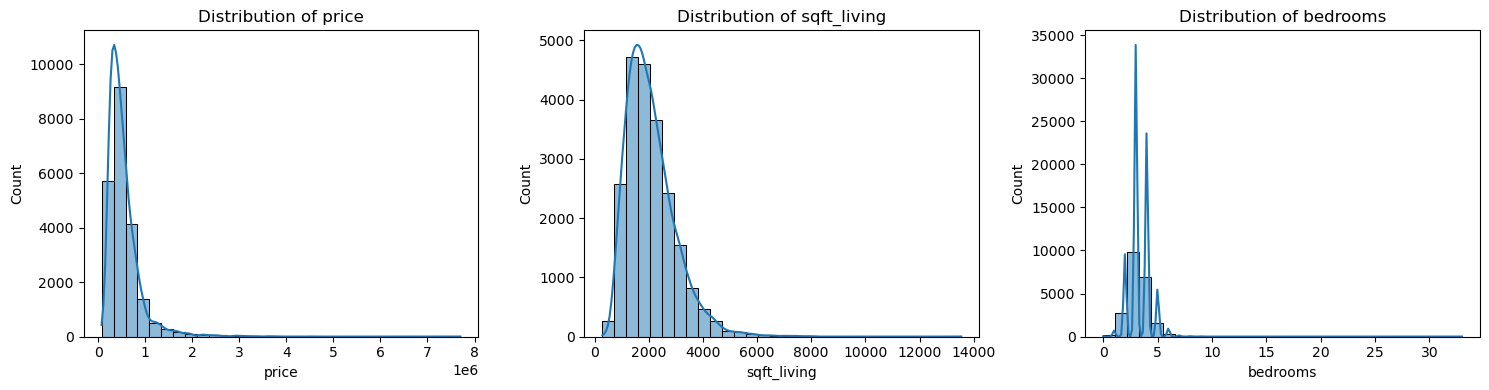

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Downloads/kc_house_data.csv.zip")  # Update path if needed

# Univariate Analysis

# Histograms
plt.figure(figsize=(15, 4))
for i, col in enumerate(['price', 'sqft_living', 'bedrooms']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()



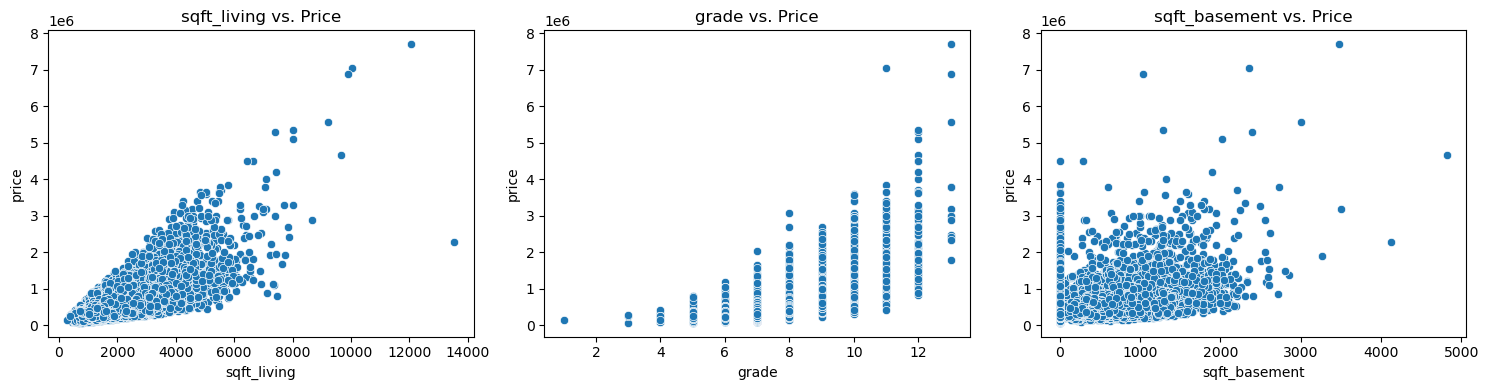

In [28]:
# Scatter plots
plt.figure(figsize=(15, 4))
scatter_features = ['sqft_living', 'grade', 'sqft_basement']
for i, feature in enumerate(scatter_features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f"{feature} vs. Price")
plt.tight_layout()
plt.show()

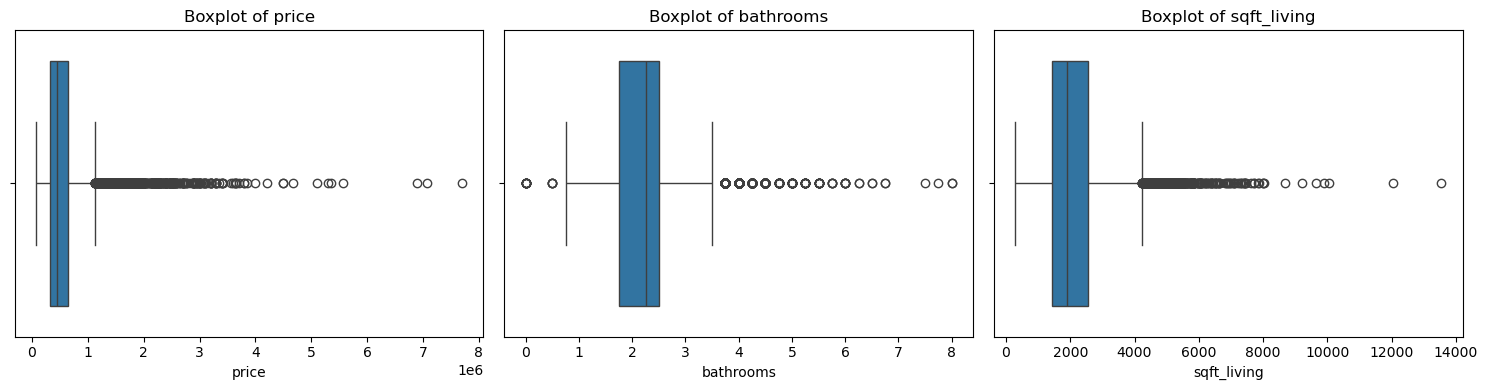

In [29]:
# Boxplots
plt.figure(figsize=(15, 4))
for i, col in enumerate(['price', 'bathrooms', 'sqft_living']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


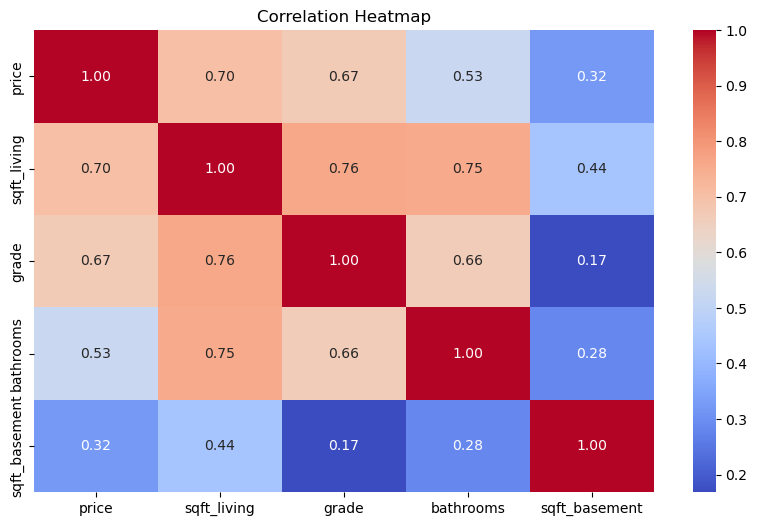

In [30]:

# Correlation heatmap
plt.figure(figsize=(10, 6))
top_corr_features = ['price', 'sqft_living', 'grade', 'bathrooms', 'sqft_basement']
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


📊 XGBoost Performance Metrics:
MAE: $150,169.70
RMSE: $264,382.94
R² Score: 0.5376


<Figure size 1000x600 with 0 Axes>

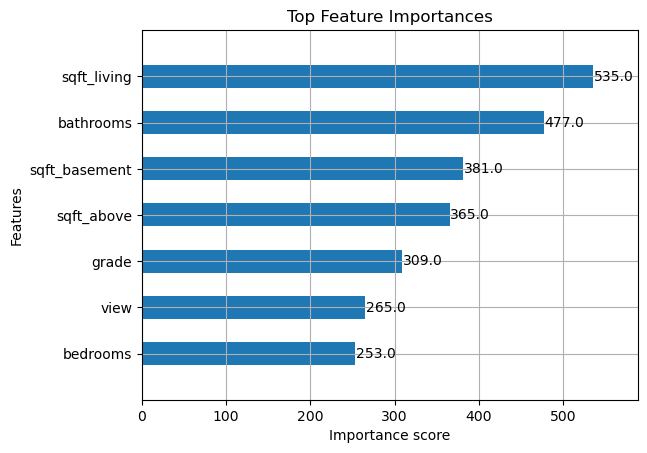

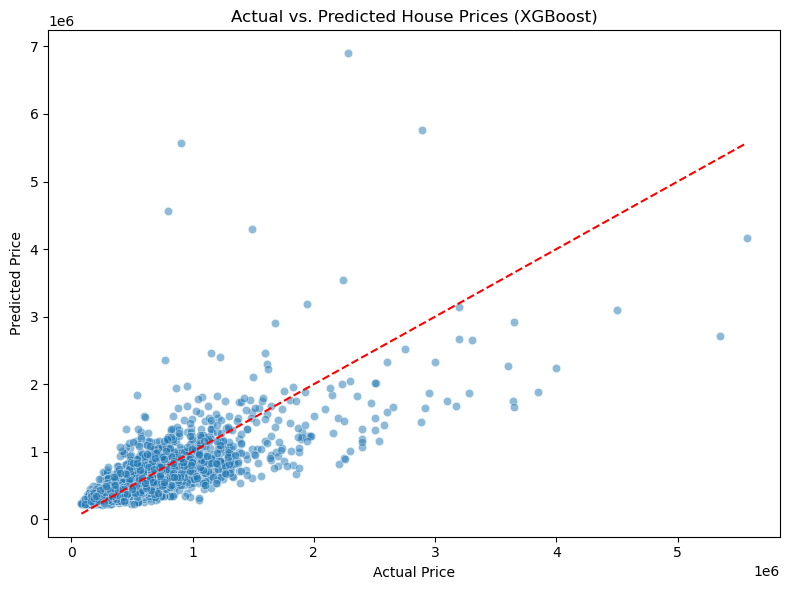

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance

# Load dataset
df = pd.read_csv("Downloads/kc_house_data.csv.zip")  # Make sure the path is correct

# Feature selection
features = ['sqft_living', 'bedrooms', 'bathrooms', 'grade', 'view', 'sqft_above', 'sqft_basement']
X = df[features]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# 11.1  Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n XGBoost Performance Metrics:")
print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

# 11.3  Visuals

# Feature Importance Plot
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='weight', max_num_features=10, height=0.5)
plt.title("Top Feature Importances")
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # diagonal line
plt.tight_layout()
plt.show()


In [42]:
import gradio as gr
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Fix random seed
np.random.seed(42)

# Generate synthetic dataset with floors at least 10
num_samples = 1000
bedrooms = np.random.randint(1, 8, num_samples)
bathrooms = np.round(np.random.uniform(1, 5, num_samples), 1)
sqft_living = np.random.randint(400, 7000, num_samples)
sqft_lot = np.random.randint(1000, 15000, num_samples)
floors = np.random.randint(10, 21, num_samples)  # floors between 10 and 20 inclusive
waterfront = np.random.choice([0, 1], num_samples)
view = np.random.randint(0, 5, num_samples)
condition = np.random.randint(1, 6, num_samples)
grade = np.random.randint(1, 14, num_samples)
sqft_above = np.random.randint(300, 5000, num_samples)
sqft_basement = sqft_living - sqft_above
sqft_basement = np.clip(sqft_basement, 0, None)
yr_built = np.random.randint(1900, 2023, num_samples)
yr_renovated = np.random.choice(
    np.append([0], np.random.randint(1930, 2023, num_samples // 10)),
    num_samples,
)
zipcode = np.random.randint(98000, 98100, num_samples)

# Synthetic price formula with noise
price = (
    sqft_living * 200
    + bedrooms * 10000
    + bathrooms * 15000
    + floors * 5000
    + waterfront * 50000
    + view * 20000
    + condition * 10000
    + grade * 15000
    + sqft_basement * 50
    - (2023 - yr_built) * 1000
    + np.where(yr_renovated > 0, 20000, 0)
    + np.random.normal(0, 40000, num_samples)
)
price = np.clip(price, 50000, None)

# Create DataFrame
df = pd.DataFrame(
    {
        "bedrooms": bedrooms,
        "bathrooms": bathrooms,
        "sqft_living": sqft_living,
        "sqft_lot": sqft_lot,
        "floors": floors,
        "waterfront": waterfront,
        "view": view,
        "condition": condition,
        "grade": grade,
        "sqft_above": sqft_above,
        "sqft_basement": sqft_basement,
        "yr_built": yr_built,
        "yr_renovated": yr_renovated,
        "zipcode": zipcode,
        "price": price,
    }
)

# Split data
X = df.drop(columns="price")
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train XGBoost regressor
model = XGBRegressor(objective="reg:squarederror", n_estimators=150, random_state=42)
model.fit(X_train, y_train)

def predict_price(
    bedrooms,
    bathrooms,
    sqft_living,
    sqft_lot,
    floors,
    waterfront,
    view,
    condition,
    grade,
    sqft_above,
    sqft_basement,
    yr_built,
    yr_renovated,
    zipcode,
):
    input_df = pd.DataFrame(
        {
            "bedrooms": [bedrooms],
            "bathrooms": [bathrooms],
            "sqft_living": [sqft_living],
            "sqft_lot": [sqft_lot],
            "floors": [floors],
            "waterfront": [waterfront],
            "view": [view],
            "condition": [condition],
            "grade": [grade],
            "sqft_above": [sqft_above],
            "sqft_basement": [sqft_basement],
            "yr_built": [yr_built],
            "yr_renovated": [yr_renovated],
            "zipcode": [zipcode],
        }
    )
    pred = model.predict(input_df)[0]
    return f"${pred:,.2f}"


inputs = [
    gr.Slider(1, 10, step=1, value=3, label="Bedrooms"),
    gr.Slider(1.0, 5.0, step=0.1, value=2.0, label="Bathrooms"),
    gr.Slider(400, 7000, step=50, value=1500, label="Square Footage (Living)"),
    gr.Slider(1000, 15000, step=100, value=5000, label="Square Footage (Lot)"),
    gr.Slider(10, 20, step=1, value=10, label="Floors"),
    gr.Radio([0, 1], label="Waterfront (0: No, 1: Yes)", value=0),
    gr.Slider(0, 4, step=1, value=0, label="View"),
    gr.Slider(1, 5, step=1, value=3, label="Condition"),
    gr.Slider(1, 13, step=1, value=7, label="Grade"),
    gr.Slider(300, 5000, step=50, value=1000, label="Square Footage Above Ground"),
    gr.Slider(0, 4000, step=50, value=200, label="Square Footage Basement"),
    gr.Slider(1900, 2023, step=1, value=1990, label="Year Built"),
    gr.Slider(0, 2023, step=1, value=0, label="Year Renovated (0 if none)"),
    gr.Slider(98000, 98100, step=1, value=98000, label="Zipcode"),
]

iface = gr.Interface(
    fn=predict_price,
    inputs=inputs,
    outputs=gr.Textbox(label="Predicted House Price"),
    title="House Price Prediction ",
    description="Enter house features. Note floors value starts at 10.",
)

if __name__ == "__main__":
    iface.launch()



* Running on local URL:  http://127.0.0.1:7872
* To create a public link, set `share=True` in `launch()`.
